In [40]:
from google.colab import files


diabetes = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (1).csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

In [43]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [44]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [45]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [46]:
diabetes.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Let us see the distribution of diabetic vs non-diabetic patients in this dataset

In [47]:
diabetes["diabetes"].value_counts(normalize=True)

,proportion
diabetes,
0,0.915
1,0.085


We see that 91.5% of the dataset doesn't have diabetes while 8.5% does have diabetes, creating a imbalanced dataset which we will need to take care of before making any predictions.

In [48]:
diabetes["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [49]:
# drop all rows with gender = other
diabetes = diabetes.drop(diabetes[diabetes['gender'] == 'Other'].index)

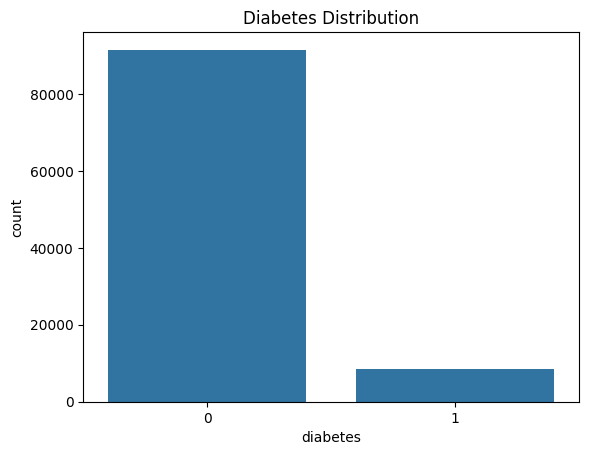

In [50]:
sns.countplot(x="diabetes", data=diabetes)
plt.title("Diabetes Distribution")
plt.show()

Let us look at the distributions of the other numerical features

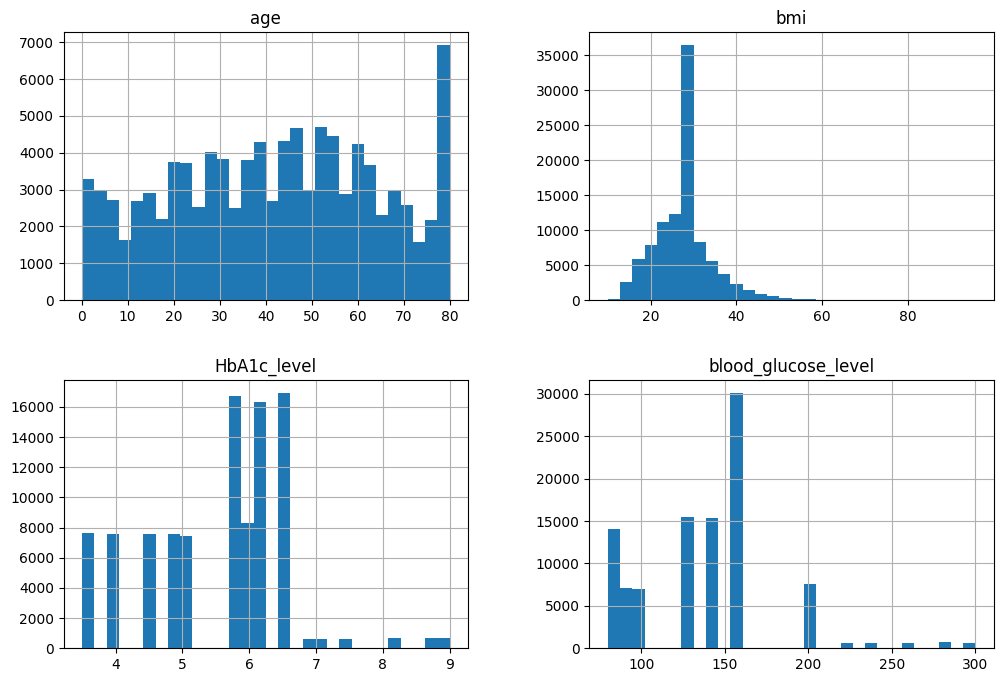

In [51]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
diabetes[num_cols].hist(bins=30, figsize=(12,8))
plt.show()


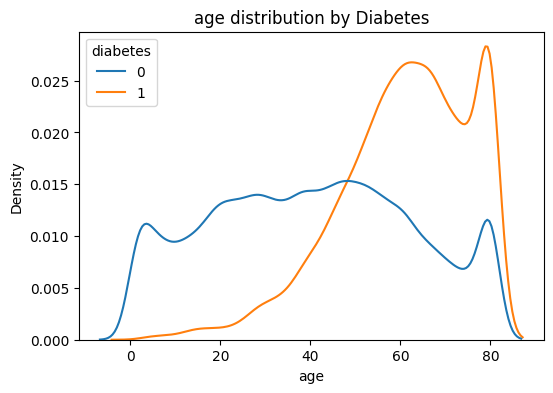

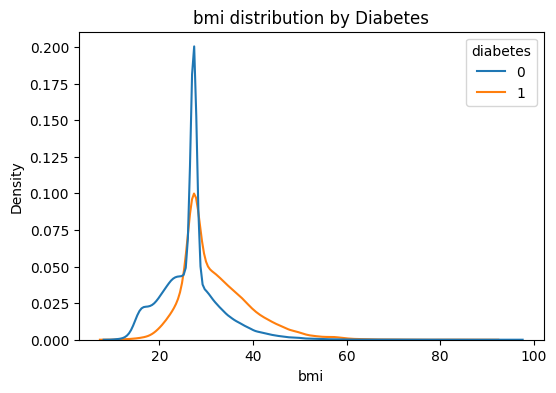

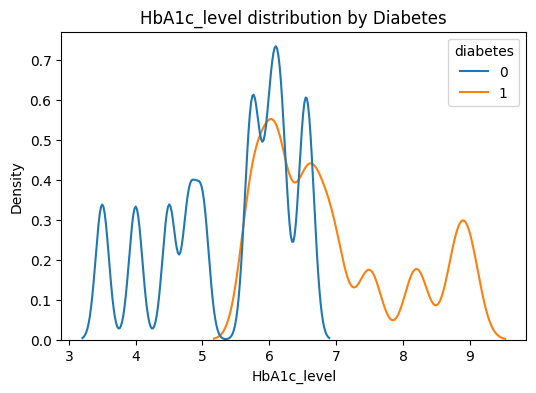

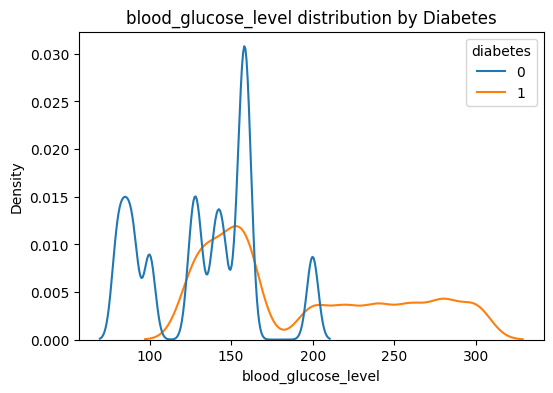

In [52]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=diabetes, x=col, hue='diabetes', common_norm=False)
    plt.title(f'{col} distribution by Diabetes')
    plt.show()

Insights on distributions between diabetic and non-diabetic:


1.   We see that as age increases -> count of diabetes increases
2.   We see that for those without diabetes, HbA1c ranges from 3 to 7 but for those with diabetes, it ranges from 5 to 9
3. Looking at blood glucose levels we see that those with diabetes do have higher levels of glucose but its at a low density where those without diabetes dominate the lower range of blood glucose levels hinting at those who might be on the transition to diabetes?



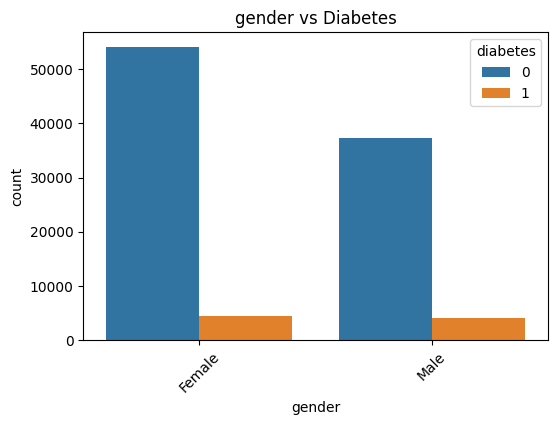

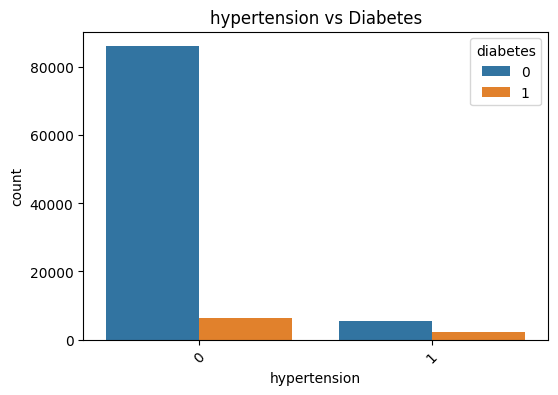

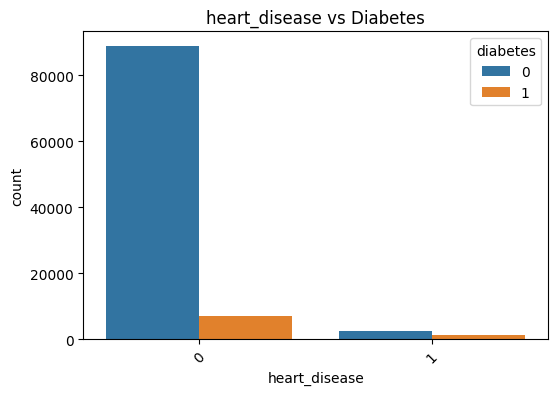

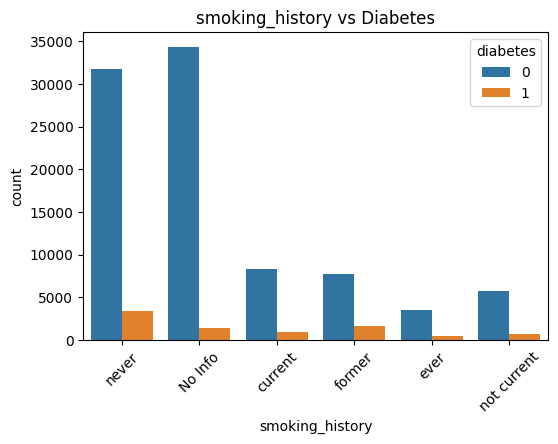

In [53]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='diabetes', data=diabetes)
    plt.title(f'{col} vs Diabetes')
    plt.xticks(rotation=45)
    plt.show()

Observations:


1.  I see that between Male and Female, that the number of diabetic cases are the same indicating that maybe gender has no effect on being diabetic but I will do a hypothesis test
2.   As for hypertension, heart disease and smoking history, I see that most cases are for the lack of them but maybe I will test the small amount of cases of them to see if the proportion of those with the disease,tension or smoking with diabetes is higher than those without the disease/tension/smoking.



In [54]:
contingency_table = pd.crosstab(diabetes['gender'],diabetes['diabetes'])
print(contingency_table)

diabetes      0     1
gender               
Female    54091  4461
Male      37391  4039


In [55]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")

Chi-Square Statistic = 141.2490
p-value = 0.0000


Chi-squared test seems to tell us their is a association between gender and diabetes but let us see which gender has a higher diabetes rate.



In [56]:
diabetes.groupby("gender")["diabetes"].mean()

,diabetes
gender,
Female,0.076189
Male,0.097490


We see that males are 2% more prone to having diabetes compared to females

I now want to test the other categorical variables to see if having them increases the odds of having diabetes

In [57]:
# Hypertension vs Diabetes
contingency_table = pd.crosstab(diabetes['hypertension'],diabetes['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")

Chi2 Statistic: 3909.50978108035
p-value: 0.0


In [58]:
pd.crosstab(diabetes['hypertension'], diabetes['diabetes'], normalize='index')

diabetes,0,1
hypertension,,
0,0.930679,0.069321
1,0.721042,0.278958


In [59]:
# Heart Disease vs Diabetes
contingency_table = pd.crosstab(diabetes['heart_disease'],diabetes['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")

Chi2 Statistic: 2945.00678944634
p-value: 0.0


In [60]:
pd.crosstab(diabetes['heart_disease'], diabetes['diabetes'], normalize='index')

diabetes,0,1
heart_disease,,
0,0.924688,0.075312
1,0.678590,0.321410


In [61]:
# Smoking History vs Diabetes
contingency_table = pd.crosstab(diabetes['smoking_history'],diabetes['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")

Chi2 Statistic: 1955.9388079602643
p-value: 0.0


In [62]:
pd.crosstab(diabetes['smoking_history'], diabetes['diabetes'], normalize='index')


diabetes,0,1
smoking_history,,
No Info,0.959397,0.040603
current,0.897911,0.102089
ever,0.882088,0.117912
former,0.829983,0.170017
never,0.904651,0.095349
not current,0.892841,0.107159


We see that after performing hypothesis testing and calculating proportions that having hypertension, heart disease or a smoking history has a higher proportion of those with diabetes compared to those without.

Let us perform correlation analysis now

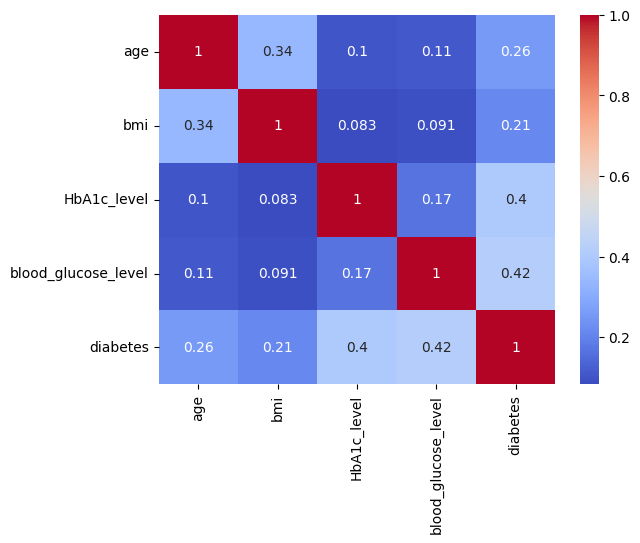

In [63]:
corr = diabetes[num_cols + ['diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

We see that HbA1c and blood glucose have a moderately positve correlation with diabetes which makes sense since diabetics both have higher values for these.
We see that HbA1c vs blood glucose have a correlation of 0.17 which means they are related but not strongly so their is no issue of multi-collinearity.
We will probably use both of these variables in our model!

In [64]:
diabetes.describe().loc[['mean', 'std']]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906


We see that Hypertension and Heart Disease is 0 in more than 80% of the cases which can cause imbalance but let us we know the presence of these predictors correlate with a much higher diabetes rate which will help flag higher risk cases.

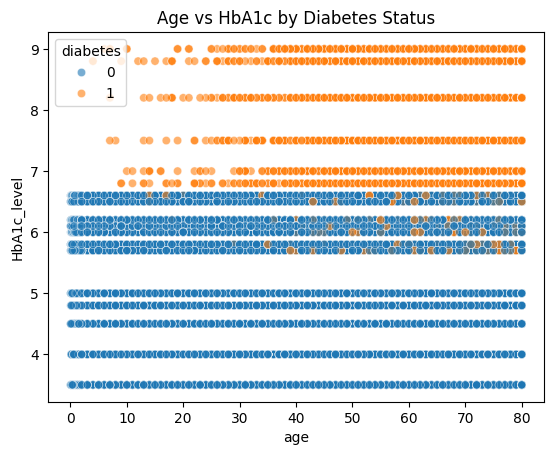

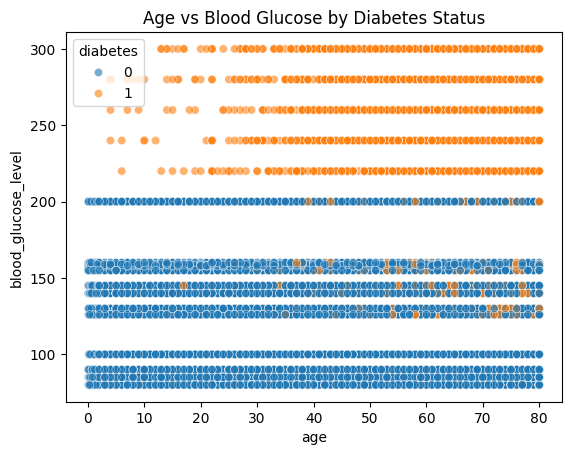

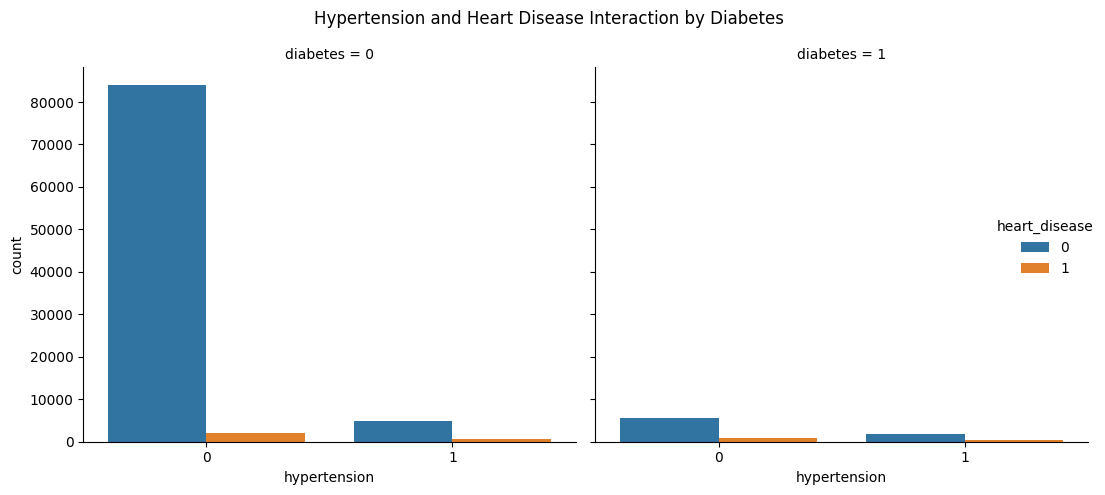

In [65]:
# Example: Age vs HbA1c colored by diabetes
sns.scatterplot(x='age', y='HbA1c_level', hue='diabetes', data=diabetes, alpha=0.6)
plt.title("Age vs HbA1c by Diabetes Status")
plt.show()

# Age vs Blood Glucose
sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=diabetes, alpha=0.6)
plt.title("Age vs Blood Glucose by Diabetes Status")
plt.show()

# Hypertension × Heart Disease (categorical interaction)
sns.catplot(x='hypertension', hue='heart_disease', col='diabetes', kind='count', data=diabetes)
plt.suptitle("Hypertension and Heart Disease Interaction by Diabetes")
plt.tight_layout()
plt.show()


It seems that age x HbA1c and age x blood_glucose_level could be potential interaction terms

Let us move on to encoding and standardizing the variables.
We will be not including BMI and keeping the rest

In [66]:
diabetes.drop("bmi",axis=1,inplace=True)

In [67]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,6.6,140,0
1,Female,54.0,0,0,No Info,6.6,80,0
2,Male,28.0,0,0,never,5.7,158,0
3,Female,36.0,0,0,current,5.0,155,0
4,Male,76.0,1,1,current,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,6.2,90,0
99996,Female,2.0,0,0,No Info,6.5,100,0
99997,Male,66.0,0,0,former,5.7,155,0
99998,Female,24.0,0,0,never,4.0,100,0


In [68]:
# Reclassify Smoking History
smoking_map = {
    'never': 'No Smoking',
    'No Info': 'No Smoking',
    'current': 'Smoking',
    'former': 'Smoking',
    'ever': 'Smoking',
    'not current': 'Smoking'
}

diabetes["smoking_history"] = diabetes["smoking_history"].map(smoking_map)

In [69]:
# Encode gender with one-hot encoding
diabetes = pd.get_dummies(diabetes, columns=['gender'], drop_first=True)

# Encode smoking history with one-hot encoding
diabetes = pd.get_dummies(diabetes, columns=['smoking_history'], drop_first=True)

In [70]:
diabetes

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_Smoking
0,80.0,0,1,6.6,140,0,False,False
1,54.0,0,0,6.6,80,0,False,False
2,28.0,0,0,5.7,158,0,True,False
3,36.0,0,0,5.0,155,0,False,True
4,76.0,1,1,4.8,155,0,True,True
...,...,...,...,...,...,...,...,...
99995,80.0,0,0,6.2,90,0,False,False
99996,2.0,0,0,6.5,100,0,False,False
99997,66.0,0,0,5.7,155,0,True,True
99998,24.0,0,0,4.0,100,0,False,False


In [71]:
from sklearn.preprocessing import StandardScaler

# List your numeric columns
num_cols = ['age', 'HbA1c_level', 'blood_glucose_level']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
diabetes[num_cols] = scaler.fit_transform(diabetes[num_cols])

In [72]:
diabetes

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_Smoking
0,1.692577,0,1,1.001692,0.047709,0,False,False
1,0.537899,0,0,1.001692,-1.426157,0,False,False
2,-0.616779,0,0,0.161089,0.489869,0,True,False
3,-0.261494,0,0,-0.492714,0.416175,0,False,True
4,1.514935,1,1,-0.679515,0.416175,0,True,True
...,...,...,...,...,...,...,...,...
99995,1.692577,0,0,0.628091,-1.180513,0,False,False
99996,-1.771458,0,0,0.908292,-0.934869,0,False,False
99997,1.070828,0,0,0.161089,0.416175,0,True,True
99998,-0.794422,0,0,-1.426718,-0.934869,0,False,False


In [73]:
diabetes["age_hba1c"] = diabetes["age"] * diabetes["HbA1c_level"]
diabetes["age_glucose"] = diabetes["age"] * diabetes["blood_glucose_level"]

In [74]:
# Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = diabetes[["age","HbA1c_level","blood_glucose_level","age_hba1c","age_glucose"]]
X_scaled = StandardScaler().fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]
print(vif_data)

               Feature       VIF
0                  age  1.020061
1          HbA1c_level  1.057237
2  blood_glucose_level  1.095661
3            age_hba1c  1.053530
4          age_glucose  1.089742


No multicollineratity detected with the new columns so we can go ahead with addressing class imbalance with a weighted loss function

In [75]:
diabetes

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_Smoking,age_hba1c,age_glucose
0,1.692577,0,1,1.001692,0.047709,0,False,False,1.695441,0.080751
1,0.537899,0,0,1.001692,-1.426157,0,False,False,0.538809,-0.767129
2,-0.616779,0,0,0.161089,0.489869,0,True,False,-0.099356,-0.302141
3,-0.261494,0,0,-0.492714,0.416175,0,False,True,0.128842,-0.108827
4,1.514935,1,1,-0.679515,0.416175,0,True,True,-1.029421,0.630478
...,...,...,...,...,...,...,...,...,...,...
99995,1.692577,0,0,0.628091,-1.180513,0,False,False,1.063092,-1.998109
99996,-1.771458,0,0,0.908292,-0.934869,0,False,False,-1.609000,1.656080
99997,1.070828,0,0,0.161089,0.416175,0,True,True,0.172498,0.445652
99998,-0.794422,0,0,-1.426718,-0.934869,0,False,False,1.133416,0.742680
